## The Ultimate free ml dev stack
from [opendatascience.com](opendatascience.com)

### Register for services 

#### Algorithmia
Sign up for Algorithmia for object storage and model deployment [here](https://algorithmia.com/signup).

#### Weights and Biases
Sign up for Weights and Biases for hyperparameter optimization and model monitoring/managemnt [here](https://app.wandb.ai/login). Sign up with the same Google account as Colab and stay logged in to automatic authentication.

In [3]:
!pip install wandb
!pip install algorithmia
!pip install git+https://github.com/huggingface/transformers

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 163kB 18.1MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 122kB 15.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=90f247007542251ea1e0d42bf7243f8a624203144fe092d19de68945c939f3e5
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=1163b794d0ad7536035800e50ccc0cf71d697dd247465a34e6836043f07f6736
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=b673

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-s489zfkb
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-s489zfkb
     |████████████████████████████████| 3.0MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 44.9MB/s 
     |████████████████████████████████| 890kB 41.4MB/s 
  Created wheel for transformers: filename=transformers-3.1.0-cp36-none-any.whl size=884490 sha256=b7901cf555d90b5fe8c7f2ee99426b8b7aa51db41d867004b6fc6f083d17c296
  Stored in directory: /tmp/pip-ephem-wheel-cache-k4lrjmgd/wheels/70/d3/52/b3fa4f8b8ef04167ac62e5bb2accb62ae764db2a378247490e
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a07e5301f8560dbcd48afb15e66b0c1b433fbc14c41c81ab789c0db5dcee5311
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built transformers sacremoses


In [4]:
import os
import wandb
import logging
import zipfile
import Algorithmia

logging.basicConfig(level=logging.INFO)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


### Authenticate with Algorithmia
After signing up, on your profile page you should see the section 'API Keys' with one already made, 'default-key'. Copy that key and paste it below.

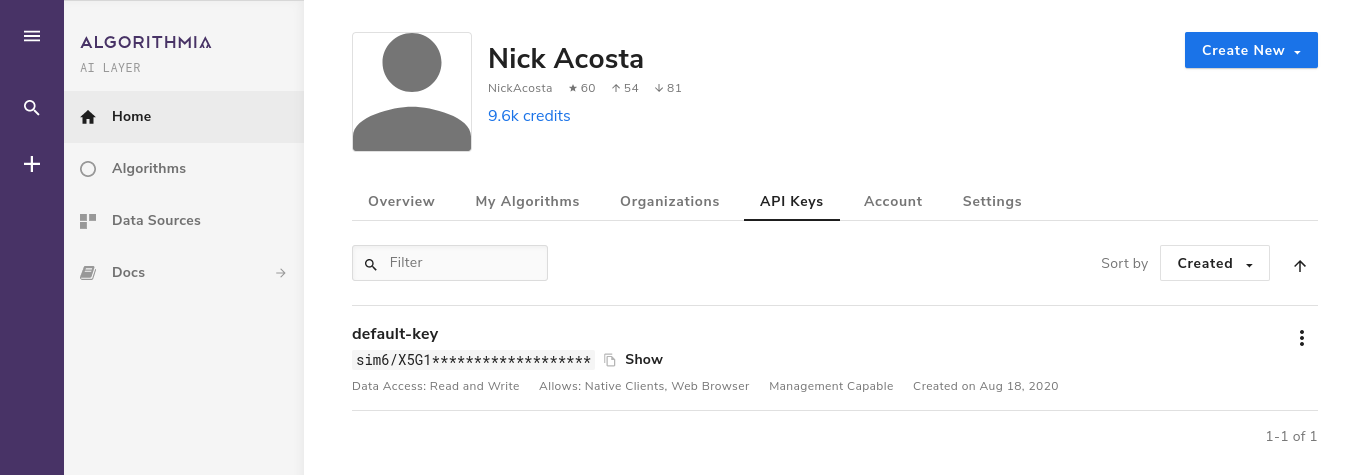

In [8]:
client = Algorithmia.client('YOUR KEY HERE')

### Get files from object storage
The dataset and training files needed to perform hyperparameter optimization are hosted on an Algorithmia object storage with public read access, the cell below downloads and upbacks them. View train.py by selecting the folder on the right to see how the pretrained BERT-like models from Hugging Face will be finetuned.

In [4]:
zip = client.file('data://NickAcosta/opendatascience/opendatascience.zip').getFile().name
os.rename(zip, './opendatascience.zip')
zipfile.ZipFile('./opendatascience.zip').extractall()

In [6]:
sweep_config = {
  "program": "./opendatascience/train.py",
  "name": "My Sweep",
  "method": "grid",
  "metric": {
      "name": "eval_mnli/acc",
      "goal": "maximize"   
    },
  "parameters": {
        "model_name": {
            "values": ['distillbert-base-cased','distillbert-base-uncased','albert-base-v2']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="hfsweep")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: 9uxscq1v
Sweep URL: https://app.wandb.ai/nickacosta/hfsweep10/sweeps/9uxscq1v


### Define HPO Sweep config and begin Sweep
The cell above define how Weights and Biases will manage hyperparameter optimization. The parameters.model_name.values section can be edited with more or less models chosen [here](https://huggingface.co/transformers/pretrained_models.html) (NOTE: Only models capable of SequenceClassification will work for this sweep.). Run the cell above to get your sweep ID and paste it in the cell below.

In [7]:
!wandb agent 9uxscq1v #<-PASTE YOUR SWEEP ID HERE

wandb: Starting wandb agent 🕵️
2020-09-03 02:48:36,412 - wandb.wandb_agent - INFO - Running runs: []
2020-09-03 02:48:36,584 - wandb.wandb_agent - INFO - Agent received command: run
2020-09-03 02:48:36,584 - wandb.wandb_agent - INFO - Agent starting run with config:
	model_name: albert-base-v2
2020-09-03 02:48:36,646 - wandb.wandb_agent - INFO - About to run command: /usr/bin/env python ./opendatascience/train.py --model_name=albert-base-v2
2020-09-03 02:48:37.852663: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
wandb: WARNING Ignoring project='hf' passed to wandb.init when running a sweep
wandb: Tracking run with wandb version 0.9.6
wandb: Run data is saved locally in wandb/run-20200903_024836-nreid8h6
wandb: Syncing run expert-sweep-1
wandb: ⭐️ View project at https://app.wandb.ai/nickacosta/hfsweep10
wandb: 🧹 View sweep at https://app.wandb.ai/nickacosta/hfsweep10/sweeps/9uxscq1v
wandb: 🚀 View run at https://ap

### Publish Model to algorithmia

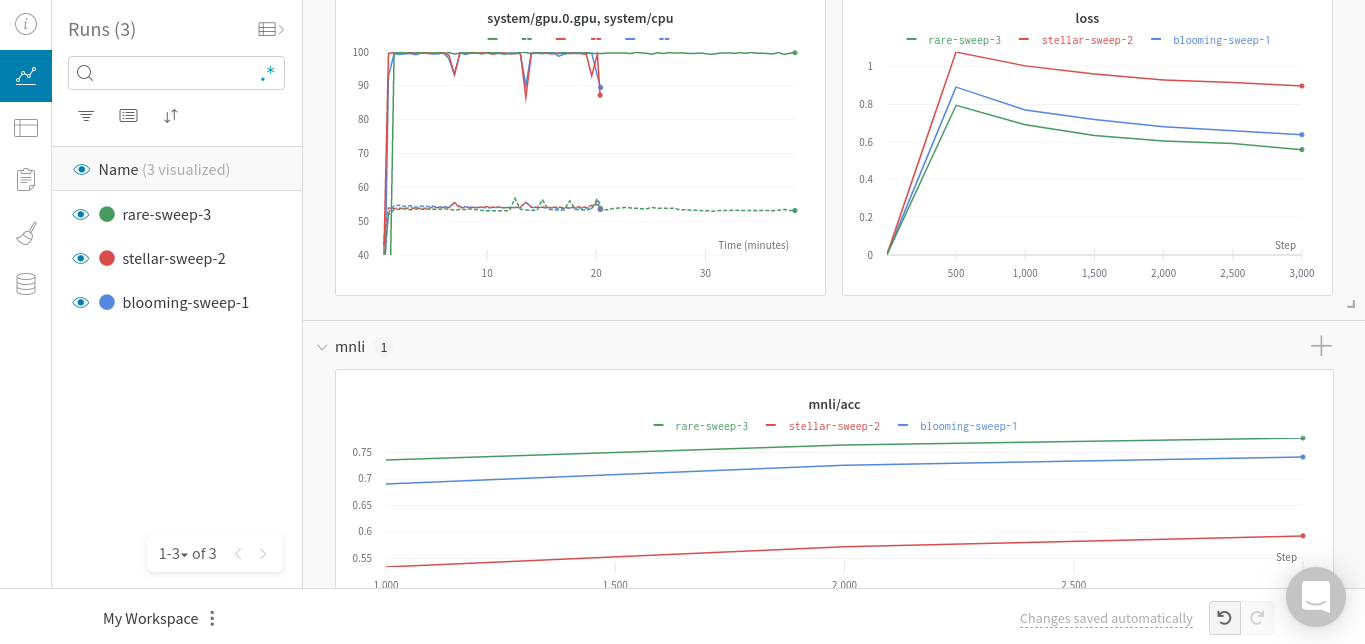

Use Weights and Biases dashboard of your sweep to find the best performing model, and push its relevant files to Algorithmia's object store. This model can then be  deployed on their serverless platform for inference, the source code for how I did so is [here](https://algorithmia.com/algorithms/NickAcosta/albert_mnli/source). You can deploy your model or test out the one I already have in the cells below  

In [10]:
model_file = "data://NickAcosta/opendatascience/pytorch_model.bin"
config_file = "data://NickAcosta/opendatascience/config.json"

client.file(model_file).putFile("./models/albert-base-v2/checkpoint-3000/pytorch_model.bin")
client.file(config_file).putFile("./models/albert-base-v2/checkpoint-3000/config.json")

In [20]:
input = "I like you. </s></s> I don't like you."
algo = client.algo('NickAcosta/albert_mnli/1.0.0')

#given two sentences, the model predicts whether or not the second
#contradicts the first (class 0)
#is neutral (class 1)
#entails the first (class 2) 
print(algo.pipe(input).result)

[[0.3240458369255066, 0.03184105455875397, -0.4211416244506836]]
